<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.271155,78.694364,-0.081774,142.883745,142.957542,-0.073797
1,0.0,1.0,64.565882,40.369761,0.105670,115.041313,114.937856,0.103457
2,0.0,2.0,69.306562,86.305462,-0.052837,165.559187,165.603078,-0.043891
3,0.0,3.0,21.302989,58.325863,-0.036356,89.592497,89.623917,-0.031420
4,0.0,4.0,31.102128,49.787812,0.110305,91.000244,90.887738,0.112507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.210337,27.710832,-0.060125,109.861043,109.910860,-0.049818
119996,999.0,116.0,77.466960,66.660434,0.100968,154.228362,154.117047,0.111315
119997,999.0,117.0,56.338125,55.183221,-0.319389,121.201957,121.516569,-0.314612
119998,999.0,118.0,86.607769,26.474698,0.198354,123.280821,123.068026,0.212795


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.271155,78.694364,-0.081774,142.883745,142.957542,-0.073797
1,0.0,1.0,64.565882,40.369761,0.105670,115.041313,114.937856,0.103457
2,0.0,2.0,69.306562,86.305462,-0.052837,165.559187,165.603078,-0.043891
3,0.0,3.0,21.302989,58.325863,-0.036356,89.592497,89.623917,-0.031420
4,0.0,4.0,31.102128,49.787812,0.110305,91.000244,90.887738,0.112507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.210337,27.710832,-0.060125,109.861043,109.910860,-0.049818
119996,999.0,116.0,77.466960,66.660434,0.100968,154.228362,154.117047,0.111315
119997,999.0,117.0,56.338125,55.183221,-0.319389,121.201957,121.516569,-0.314612
119998,999.0,118.0,86.607769,26.474698,0.198354,123.280821,123.068026,0.212795


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.271155  78.694364 -0.081774  142.883745  142.957542 -0.073797
      1.0    64.565882  40.369761  0.105670  115.041313  114.937856  0.103457
      2.0    69.306562  86.305462 -0.052837  165.559187  165.603078 -0.043891
      3.0    21.302989  58.325863 -0.036356   89.592497   89.623917 -0.031420
      4.0    31.102128  49.787812  0.110305   91.000244   90.887738  0.112507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  72.210337  27.710832 -0.060125  109.861043  109.910860 -0.049818
      116.0  77.466960  66.660434  0.100968  154.228362  154.117047  0.111315
      117.0  56.338125  55.183221 -0.319389  121.201957  121.516569 -0.314612
      118.0  86.607769  26.474698  0.198354  123.280821  123.068026  0.212795
      119.0  69.561792  39.131138  0.034418  118.727348  118.683800  0.043548

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.271155  78.694364 -0.081774  142.883745  142.957542 -0.073797
      1.0    64.565882  40.369761  0.105670  115.041313  114.937856  0.103457
      2.0    69.306562  86.305462 -0.052837  165.559187  165.603078 -0.043891
      3.0    21.302989  58.325863 -0.036356   89.592497   89.623917 -0.031420
      4.0    31.102128  49.787812  0.110305   91.000244   90.887738  0.112507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  72.210337  27.710832 -0.060125  109.861043  109.910860 -0.049818
      116.0  77.466960  66.660434  0.100968  154.228362  154.117047  0.111315
      117.0  56.338125  55.183221 -0.319389  121.201957  121.516569 -0.314612
      118.0  86.607769  26.474698  0.198354  123.280821  123.068026  0.212795
      119.0  69.561792  39.131138  0.034418  118.727348  118.683800  0.043548

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.271155,78.694364,-0.081774,142.883745,142.957542,-0.073797
1,0.0,1.0,64.565882,40.369761,0.105670,115.041313,114.937856,0.103457
2,0.0,2.0,69.306562,86.305462,-0.052837,165.559187,165.603078,-0.043891
3,0.0,3.0,21.302989,58.325863,-0.036356,89.592497,89.623917,-0.031420
4,0.0,4.0,31.102128,49.787812,0.110305,91.000244,90.887738,0.112507
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.210337,27.710832,-0.060125,109.861043,109.910860,-0.049818
119996,999.0,116.0,77.466960,66.660434,0.100968,154.228362,154.117047,0.111315
119997,999.0,117.0,56.338125,55.183221,-0.319389,121.201957,121.516569,-0.314612
119998,999.0,118.0,86.607769,26.474698,0.198354,123.280821,123.068026,0.212795


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.271155  78.694364 -0.081774  142.883745  142.957542 -0.073797
      1.0    64.565882  40.369761  0.105670  115.041313  114.937856  0.103457
      2.0    69.306562  86.305462 -0.052837  165.559187  165.603078 -0.043891
      3.0    21.302989  58.325863 -0.036356   89.592497   89.623917 -0.031420
      4.0    31.102128  49.787812  0.110305   91.000244   90.887738  0.112507
...                ...        ...       ...         ...         ...       ...
999.0 115.0  72.210337  27.710832 -0.060125  109.861043  109.910860 -0.049818
      116.0  77.466960  66.660434  0.100968  154.228362  154.117047  0.111315
      117.0  56.338125  55.183221 -0.319389  121.201957  121.516569 -0.314612
      118.0  86.607769  26.474698  0.198354  123.280821  123.068026  0.212795
      119.0  69.561792  39.131138  0.034418  118.727348  118.683800  0.043548

[120000 rows x 6 columns]

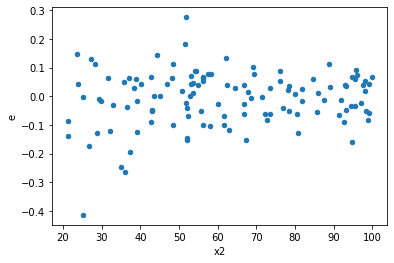

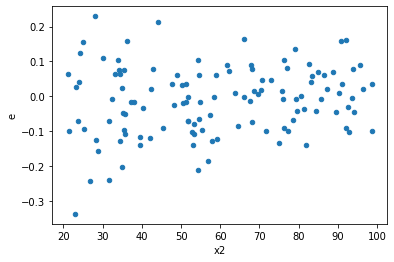

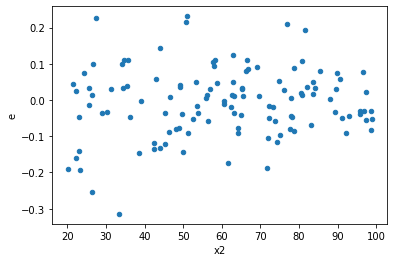

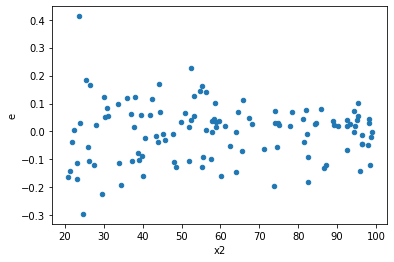

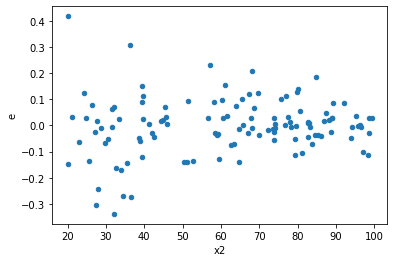

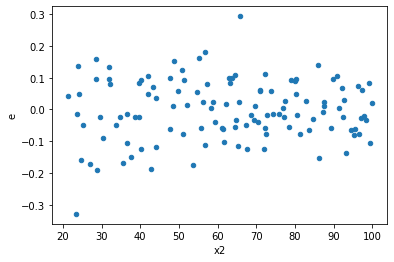

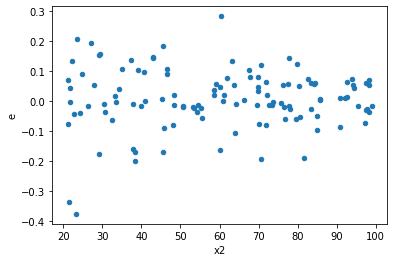

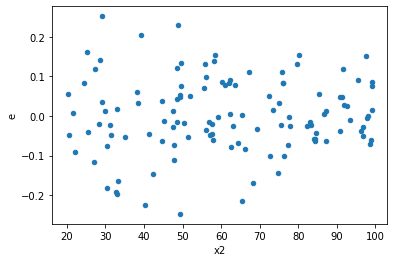

In [18]:
tablenew0 = table.loc[2.0]
tablenew1 = table.loc[4.0]
tablenew2 = table.loc[5.0]
tablenew3 = table.loc[9.0]
tablenew4 = table.loc[11.0]
tablenew5 = table.loc[13.0]
tablenew6 = table.loc[14.0]
tablenew7 = table.loc[15.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
10.0,46.0,46.0,0.30504382618010795,0.46888557477798976,0.006631387525654521,0.010193164669086733,1.5371088825156036,0.14860494543834335,0.9256975272808283,0.07430247271917167,Reject001=1 : Homoscedasticity
137.0,46.0,46.0,0.4178602865198287,0.4635016836060146,0.009083919272170188,0.010076123556652493,1.1092264533351872,0.7266727296114062,0.6366636351942969,0.3633363648057031,Reject001=1 : Homoscedasticity
197.0,46.0,46.0,0.37418466799705824,0.39905281093612016,0.008134449304283874,0.00867506110730696,1.0664595454222552,0.8282075326337277,0.5858962336831361,0.41410376631686385,Reject001=1 : Homoscedasticity
203.0,46.0,46.0,0.2750962387057157,0.29319514422873005,0.005980353015341645,0.006373807483233262,1.0657911776917302,0.8298553132204587,0.5850723433897707,0.41492765661022935,Reject001=1 : Homoscedasticity
228.0,46.0,46.0,0.30189355438940707,0.3236878852242735,0.006562903356291458,0.007036693157049424,1.0721921038657032,0.8141487866283681,0.592925606685816,0.40707439331418405,Reject001=1 : Homoscedasticity
414.0,46.0,46.0,0.3339013352022958,0.35148047225329415,0.0072587246783107785,0.007640879831593351,1.0526476991784053,0.8626172132022907,0.5686913933988547,0.43130860660114534,Reject001=1 : Homoscedasticity
504.0,46.0,46.0,0.3604962502853159,0.41964348212801883,0.00783687500620252,0.009122684394087366,1.1640716978217962,0.6085374562884354,0.6957312718557823,0.3042687281442177,Reject001=1 : Homoscedasticity
601.0,46.0,46.0,0.3229298930706773,0.35869910920982984,0.007020215066753855,0.007797806721952822,1.1107646486332683,0.7231697596370394,0.6384151201814803,0.3615848798185197,Reject001=1 : Homoscedasticity
640.0,46.0,46.0,0.33472317190758005,0.3687366563219503,0.007276590693643044,0.008016014267868484,1.1016167605622524,0.7441586774614861,0.6279206612692569,0.37207933873074306,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.47499252434635153,0.3046655068978988,0.01032592444231199,0.006623163193432582,0.6414111618222965,0.13576488313143045,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,0.3794541521838022,0.3550707444820853,0.008249003308343526,0.00771892922787142,0.9357408330851368,0.8227658966527286,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,0.7148623750870405,0.1867948467919231,0.015540486414935663,0.00406075753895485,0.26130182997696483,1.2263384303774636e-05,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.49116959358024215,0.30146925653578416,0.010677599860440047,0.0065536794899083515,0.6137783374135787,0.10135722183288517,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,0.5509084389921067,0.2381065884647672,0.011976270412871885,0.005176230184016678,0.4322071901827932,0.005277806967857254,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.570715769487183,0.24546383740877323,0.012406864554069195,0.005336170378451592,0.4300982214480159,0.005025616044414006,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,0.4151334286794492,0.2847362239328561,0.00902463975390107,0.006189917911583828,0.6858908588465396,0.20481632526679935,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,0.42823937887898555,0.21541769180571596,0.009309551714760556,0.00468299330012426,0.5030310205698996,0.021712090208154757,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,0.609308457577464,0.3286436730964868,0.013245836034292696,0.007144427676010583,0.5393715925151177,0.03881972460462303,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      504
Reject001=0 : Heteroscedasticity    496
Name: Result_test, dtype: int64